<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

(60000, 28, 28)
(60000,)


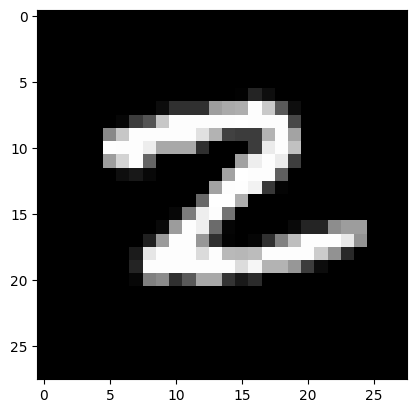

2


In [3]:
print(x_train_org.shape)
print(y_train_org.shape)

plt.imshow(x_train_org[143], cmap="gray")
plt.show()
print(y_train_org[143])

In [4]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
y_train = y_train_org.reshape(y_train_org.shape[0], -1)

x_test = x_test_org.reshape(x_test_org.shape[0], -1)
y_test = y_test_org.reshape(y_test_org.shape[0], -1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [5]:
x_train = x_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255
y_test = y_test.astype('float32') / 255

In [6]:
CLASS_COUNT = 10

In [7]:
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

y_train.shape

(60000, 10)

In [8]:
model = Sequential()

model.add(Dense(1000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(CLASS_COUNT, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 16s 13ms/step - loss: 0.2278 - accuracy: 0.9296 - val_loss: 0.1581 - val_accuracy: 0.9523
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1015 - accuracy: 0.9680 - val_loss: 0.1292 - val_accuracy: 0.9624
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0737 - accuracy: 0.9767 - val_loss: 0.1070 - val_accuracy: 0.9702
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0568 - accuracy: 0.9816 - val_loss: 0.1139 - val_accuracy: 0.9697
Epoch 5/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.1063 - val_accuracy: 0.9734
Epoch 6/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0882 - val_accuracy: 0.9781
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.1139 - val_accuracy: 0.9743
Epoc

In [16]:
print(history.history["loss"][-1])
print(history.history["val_loss"][-1])
print(history.history["accuracy"][-1])
print(history.history["val_accuracy"][-1])

0.0233427956700325
0.10815367847681046
0.9927916526794434
0.9781666398048401


In [15]:
loss, acc = model.evaluate(x_train, y_train)
print(loss)
print(acc)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9921
0.03150205314159393
0.9921333193778992


3


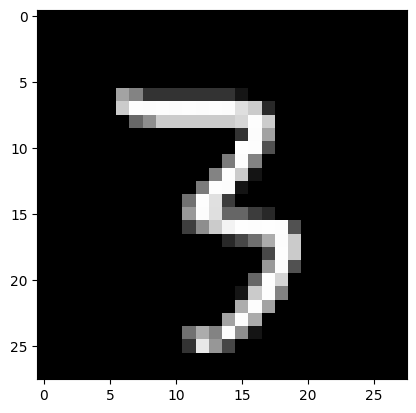

In [12]:
from random import randint


n = randint(1, 100)

plt.imshow(x_train_org[n], cmap="gray")
plt.show
print(y_train_org[n])

In [13]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 97ms/step


array([[1.1968882e-11, 1.5829325e-08, 5.6331214e-11, 4.5108213e-06,
        7.9191569e-13, 9.9999547e-01, 2.6878505e-08, 1.6978505e-11,
        1.6873093e-08, 3.9155090e-08]], dtype=float32)

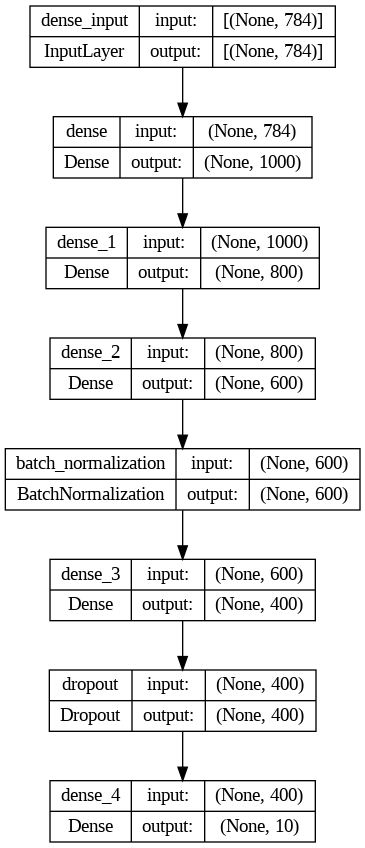

In [14]:
utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)